## Fit execution time

This is connected to FLIP [#753](https://github.com/onflow/flow/pull/753)

`execution_effort/execution_time` should (on average) be a constant that only depends on the machine running the transactions, and not the transactions themselves.

We can set `execution_effort/execution_time=1` for the calibration machine.

the collected data has the first column as the transaction identifier (the transaction type) and the last column as the actual execution time in ms. The other columns are features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data_c.csv")

In [8]:
# taken from https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137

def compute_cost(X, y, theta):
    """
    Take in a numpy array X,y, theta and generate the cost function     of using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2

    return 1 / (2 * m) * np.sum(square_err)


def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha

    return theta and the list of the cost of theta during each  iteration
    """

    m = len(y)
    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1 / m * error
        theta -= descent.astype(np.float32)
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


def feature_normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std

    return X_norm, mean, std


def predict(x, theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    predictions = np.dot(theta.transpose(), x)

    return predictions[0]

In [14]:
data_n = data.values
n = len(data_n[0, :])
m = len(data_n)

# TODO some features should probably be removed due to correlation

X = data_n[:, 1:-1].reshape(m, n - 2)
X = X.astype(np.float32)

X, mean_X, std_X = feature_normalization(X)
X = np.append(np.ones((m, 1)), X, axis=1)
y = data_n[:, -1].reshape(m, 1)
theta = np.zeros((33, 1), dtype=np.float32)

theta, J_history = gradient_descent(X, y, theta, 0.01, 1500)

/var/folders/pl/8lztdyrs0p190xsmg0n2lc040000gn/T/ipykernel_73218/923273191.py:42: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mean) / std


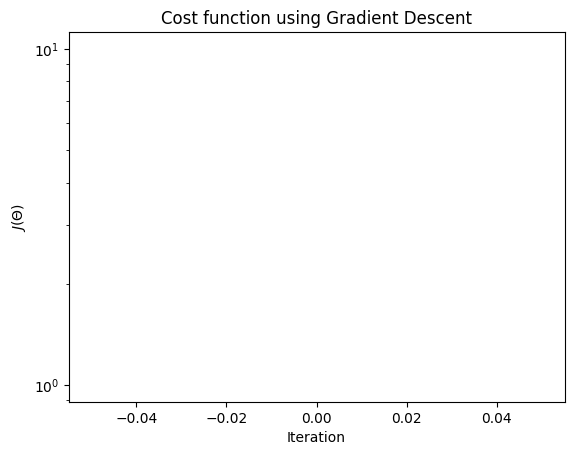

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale('log')
plt.title("Cost function using Gradient Descent")

plt.show()

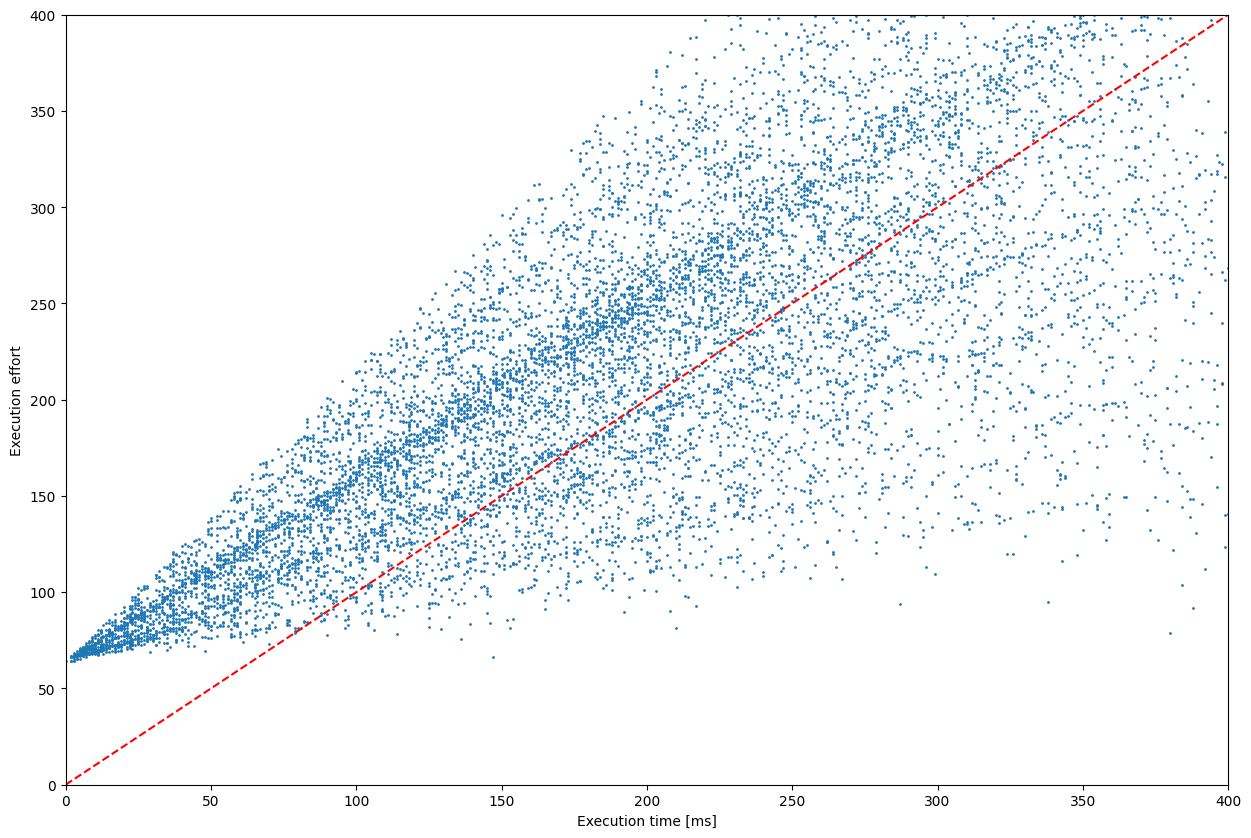

In [6]:
predicted = []
for x in X:
   predicted.append(predict(x,theta))

diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms]')
ax.set_ylabel('Execution effort')
plt.scatter(y,predicted, s=1)
plt.plot(diag, diag, 'r--')

plt.show()

Problems with the graph above:
1. Does not start at the origin.
2. Some features have negative weights. This is very unsafe, as it can be exploited.
3. Graph has lines where deta is denser, this is due to the properties of the error of execution time and the fact that there are transactions of different types.